# Car Price Prediction Tubes Statistika Industri

## Load Data

### Connect to google drive and mount it to collab (Make sure dataset for car prediction is there)

place your dataset on /content/drive/MyDive/dataset folder

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Needed Library

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import missingno as msno
import numpy as np

### Load Dataset

In [235]:
dataset_location = "/content/drive/MyDrive/dataset/cardekho.csv"
loaded_data = pd.read_csv(dataset_location)
loaded_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


## Data Description / Condition for Understanding

### Show Data Information

In [4]:
loaded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


Pada Kolom diatas, terdapat total 12 kolom mulai dari nama mobil, hingga seats yang dimiliki oleh mobil. Adapun penjelasan masing-masing kolom adalah sebagai berikut:

1.   name << Merupakan nama mobil
2.   year << Tahun pembuatan mobil
3. selling_price << Harga jual mobil dalam rupee (indian currency)
4. km_driven << Total kilometer yang ditempuh mobil
5. fuel << Jenis bahan bakar yang digunakan
6. seller_type << Tipe seller, apakah perorangan, dealer, atau yang lainnya
6. transmission << Jenis transmisi mobil, apakah manual atau automatic
7. owner << Jumlah berpindahnya kepemilikan mobil (first owner, second owner)
8. mileage << Efisiensi bahan bakar mobil / berapa banyak liter yang mobil habiskan untuk menempuh jarak dalam satuan kilometer
9. engine << spesifikasi tentang kapasitas mesin mobil untuk mengubah bahan bakar menjadi tenaga penggerak mobil dalam satuan CC
10. max_power << Kecepatan maksimal mobil dalam satuan KM
11. seats << Jumlah seats / kursi yang ada pada mobil

### Check missing value on data for later cleansing

In [5]:
loaded_data.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221


### Check Duplicate

In [6]:
loaded_data[loaded_data.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
291,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.90,1197.0,82,5.0
296,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,85.8,5.0
370,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.60,1999.0,177,5.0
371,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,5.0
372,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33,1999.0,177,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37,1461.0,108.45,5.0
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09,1248.0,88.5,5.0
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [7]:
loaded_data.duplicated().sum()

1202

### Show data statistics

In [8]:
loaded_data.describe().astype(int)

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128,8128,8128,7907,7907,7907
mean,2013,638271,69819,19,1458,5
std,4,806253,56550,4,503,0
min,1983,29999,1,0,624,2
25%,2011,254999,35000,16,1197,5
50%,2015,450000,60000,19,1248,5
75%,2017,675000,98000,22,1582,5
max,2020,10000000,2360457,42,3604,14


In [9]:
loaded_data.describe(include='object')

,name,fuel,seller_type,transmission,owner,max_power
count,8128,8128,8128,8128,8128,7913
unique,2058,4,3,2,5,320
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,74
freq,129,4402,6766,7078,5289,377


## Data Visualization

### Univariate analysis

#### Mengubah nama kolom agar memudahkan proses pengolahan dan visualisasi data

In [242]:
loaded_data = loaded_data.rename(columns={ "mileage(km/ltr/kg)": "fuel_eficiency" })
loaded_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


In [11]:
def plot_univariate_data(data, x_label="", y_label="", kind="bar", is_save=False):
  data.value_counts().plot(kind=kind)
  plt.xlabel(x_label if x_label != "" else data.name)
  plt.ylabel(y_label if y_label != "" else "Quantity")
  if(is_save):
    plt.savefig(f"{x_label}.png")
  plt.show()


In [12]:
def plot_univariate_data_in_percent(data):
  data.value_counts(normalize=True).plot(kind="bar")
  plt.xlabel(data.name)
  plt.ylabel("Percentage")
  plt.show()

#### Plot total tahun pembuatan masing-masing mobil

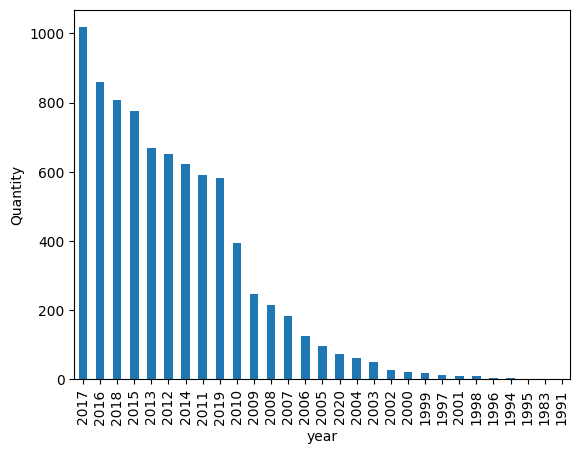

In [13]:
# plot_univariate_data(loaded_data["year"], "Tahun Pembuatan", "Jumlah")
plot_univariate_data(loaded_data["year"])

In [24]:
print(loaded_data["year"].min(), loaded_data["year"].max())

1983 2020


#### Plot Jenis bahan bakar yang digunakan mobil

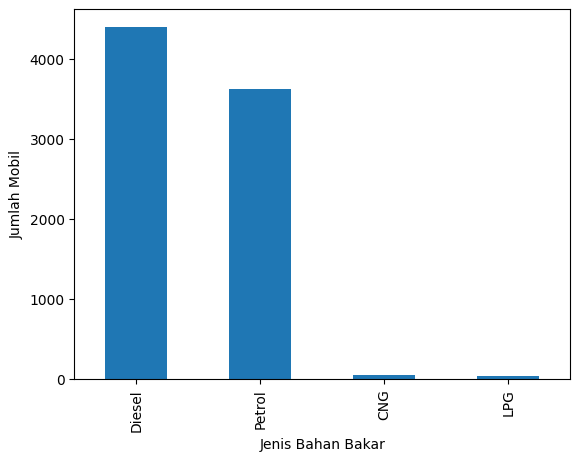

In [25]:
plot_univariate_data(loaded_data["fuel"], "Jenis Bahan Bakar", "Jumlah Mobil")

#### Plot Jumlah Seats pada mobil

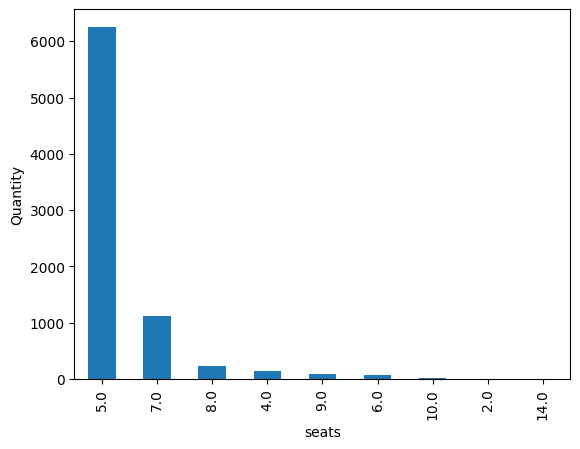

In [26]:
plot_univariate_data(loaded_data["seats"])

#### Plot jujmlah total mobil berdasarkan tipe seller

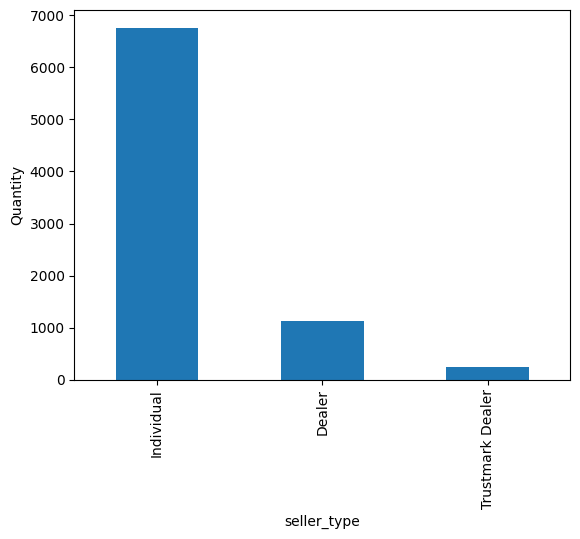

In [27]:
plot_univariate_data(loaded_data["seller_type"])

#### Plot jumlah perpindahan kepemilikan mobil

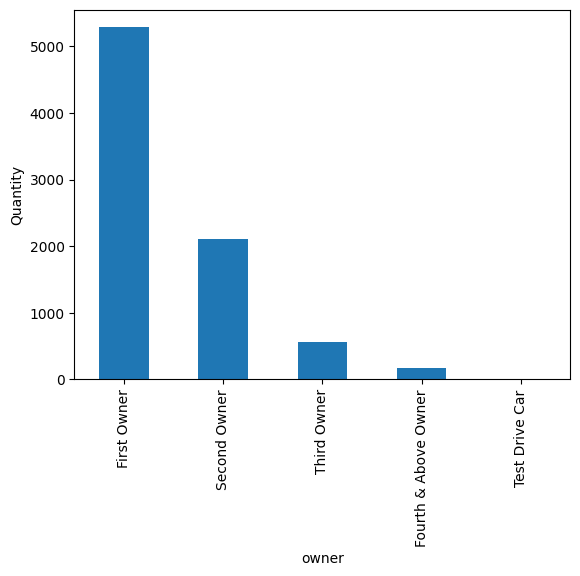

In [28]:
plot_univariate_data(loaded_data["owner"])

#### Plot jenis transimisi yang digunakan oleh mobil

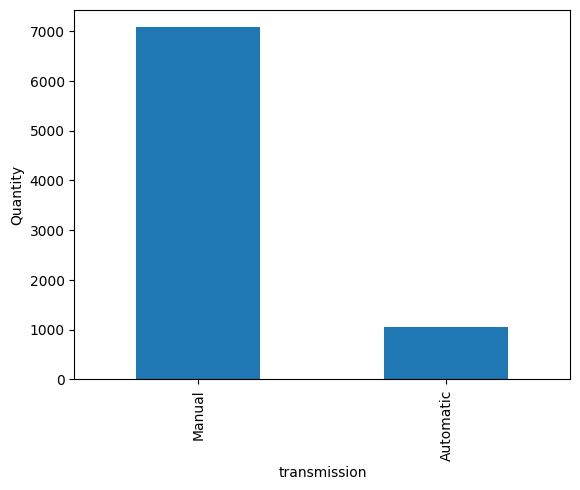

In [29]:
plot_univariate_data(loaded_data["transmission"])

In [73]:
loaded_data.describe().astype(int)

,year,selling_price,km_driven,fuel_eficiency,engine,seats
count,8128,8128,8128,7907,7907,7907
mean,2013,638271,69819,19,1458,5
std,4,806253,56550,4,503,0
min,1983,29999,1,0,624,2
25%,2011,254999,35000,16,1197,5
50%,2015,450000,60000,19,1248,5
75%,2017,675000,98000,22,1582,5
max,2020,10000000,2360457,42,3604,14


#### Plot data harga rata-rata per tahun

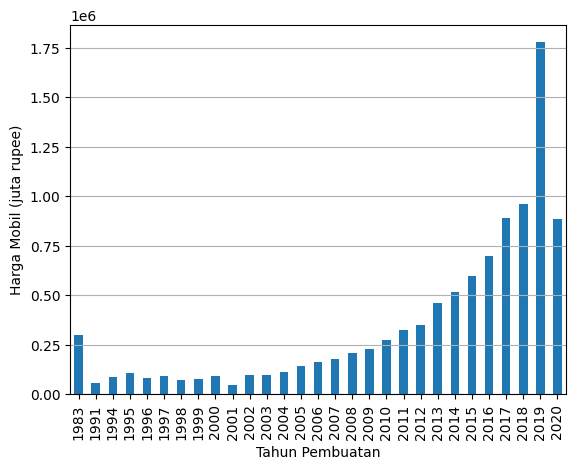

In [143]:
data_groupby_selling_price_mean = loaded_data.groupby("year")["selling_price"].mean()
# plt.scatter(data_groupby_selling_price_mean.index, data_groupby_selling_price_mean)
data_groupby_selling_price_mean.plot(kind="bar")
plt.xlabel("Tahun Pembuatan")
plt.ylabel("Harga Mobil (juta rupee)")
plt.grid(axis="y")
plt.show()

Dari grafik di atas, terlihat bahwa harga rata-rata tiap tahun meningkat seiring berjalannya waktu.

#### Plot harga terendah dan tertinggi masing-masing tahun

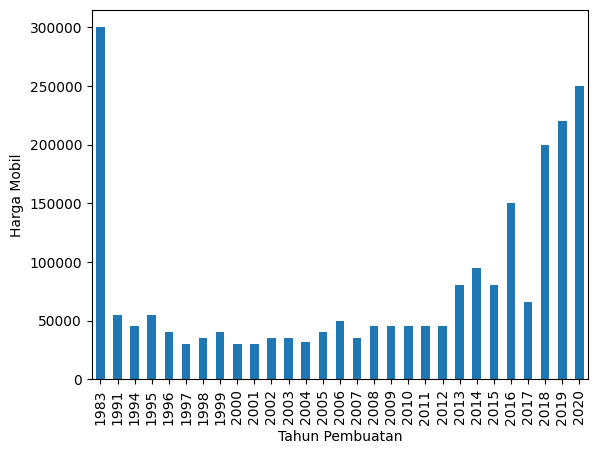

In [147]:
min_data_per_year = loaded_data.groupby("year")["selling_price"].min()

# plt.scatter(min_data_per_year.index, min_data_per_year)
min_data_per_year.plot(kind="bar")
plt.xlabel("Tahun Pembuatan")
plt.ylabel("Harga Mobil")
plt.show()

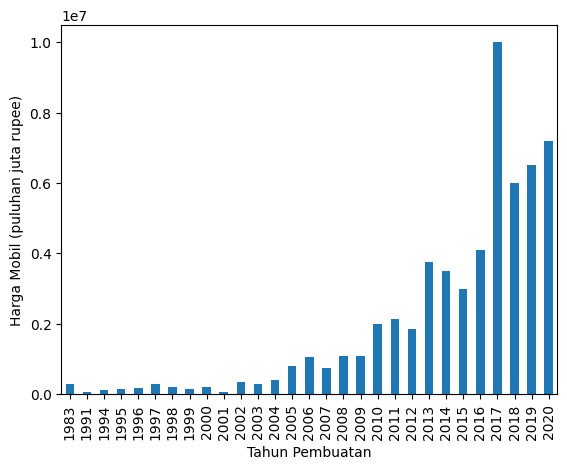

In [149]:
max_data_per_year = loaded_data.groupby("year")["selling_price"].max()
max_data_per_year.plot(kind="bar")
plt.xlabel("Tahun Pembuatan")
plt.ylabel("Harga Mobil (puluhan juta rupee)")
plt.show()

plt.show()

Dari dua grafik di atas terlihat bahwa harga terendah mobil terletak di tahun 1997, sedangkan harga tertinggi mobil ada pada tahun 2017 dengan nilai 1 x 10e7 / 10.000.000 rupee

#### Plot harga jual mobil berdasarkan fuel

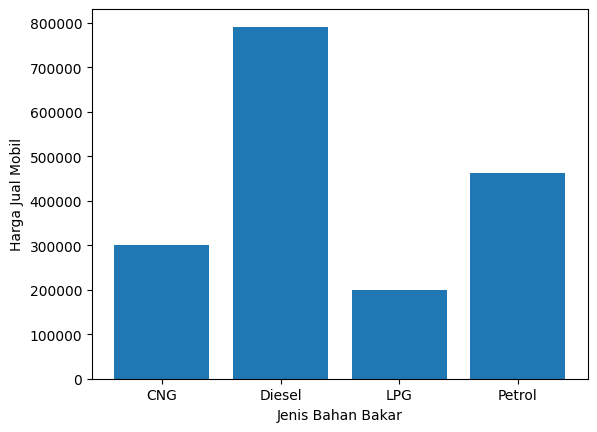

In [150]:
fuel_mean_data = loaded_data.groupby("fuel")["selling_price"].mean()
plt.bar(fuel_mean_data.index, fuel_mean_data)
plt.xlabel("Jenis Bahan Bakar")
plt.ylabel("Harga Jual Mobil")
plt.show()

Dari data tersebut terlihat bahwa jenis mobil yang menggunakan bahan bakar diesel cenderung memiliki harga yang lebih tinggi dibanding dengan mobil yang menggunakan jenis bahan bakar lainnya. Hal ini dikarenakan mobil pada dataset ini mayoritas menggunakan jenis bahan bakar diesel dan petrol

#### Plot rata-rata efisiensi bahan bakar berdasarkan transmisi

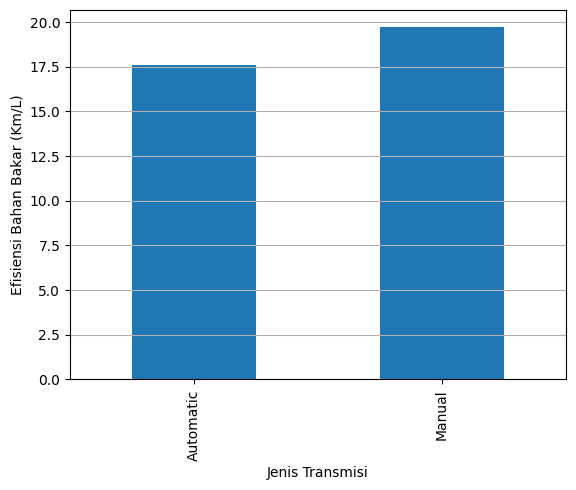

In [152]:
loaded_data.groupby("transmission")["fuel_eficiency"].mean().plot(kind="bar")
plt.grid(axis="y")
plt.xlabel("Jenis Transmisi")
plt.ylabel("Efisiensi Bahan Bakar (Km/L)")
plt.show()

Pada grafik tersebut terlihat bahwa jenis bahan bakar manual lebih efisien daripada jenis transmisi automatic. Hal ini cukup kontradiksi mengingat mobil automatic biasanya lebih efisien dibanding manual. Hal ini disebabkan data yang ada tidak balance, sehingga menyebabkan bias data yang menunjukkan bahwa mobil manual lebih efisien daripada mobil matic

#### Proporsi pemilik pertama untuk mobil dengan transmisi otomatis

owner         First Owner  Fourth & Above Owner  Second Owner  Test Drive Car  \
transmission                                                                    
Automatic             889                     6           129               4   
Manual               4400                   168          1976               1   

owner         Third Owner  
transmission               
Automatic              22  
Manual                533  


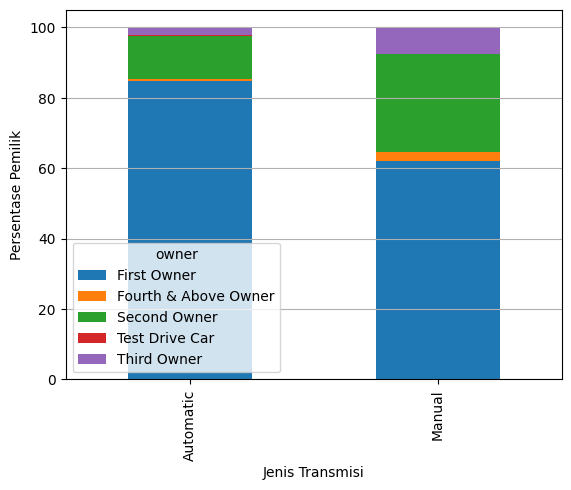

In [195]:
owner_distribution = loaded_data.groupby(["transmission", "owner"])["name"].count().unstack()
print(owner_distribution)
count = loaded_data["transmission"].value_counts()
owner_distribution_percent = owner_distribution.div(count, axis=0) * 100
owner_distribution_percent.plot(kind="bar", stacked=True)
plt.xlabel("Jenis Transmisi")
plt.ylabel("Persentase Pemilik")
plt.grid(axis="y")
plt.show()


Dari grafik di atas, terlihat bahwa persentase tertinggi penjualan mobil berdasarkan kepemilikan ke-n berdasarkan jenis transmisi yaitu di atas 60%

#### Plot grafik untuk melihat apakah performa mobil masing-masing tipe seller berbeda?

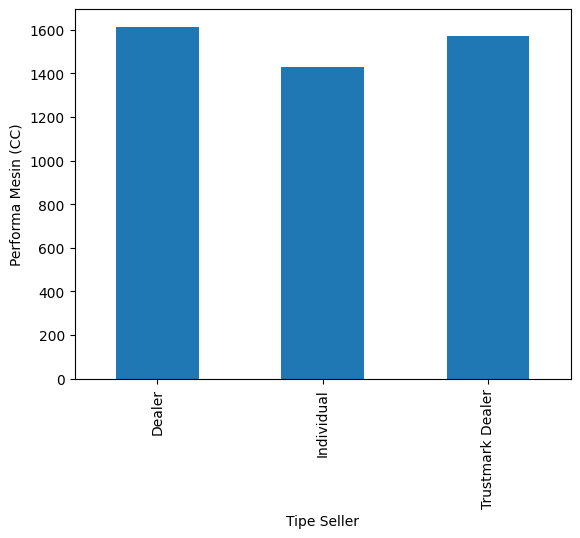

In [196]:
loaded_data.groupby("seller_type")["engine"].mean().plot(kind="bar")
plt.xlabel("Tipe Seller")
plt.ylabel("Performa Mesin (CC)")
plt.show()

Terlihat bahwa performa mesin yang dijual oleh dealer, ataupun trustmark dealer memiliki performa mesin > 1400 CC.

### Kondisi Data

In [201]:
loaded_data.describe()

,year,selling_price,km_driven,fuel_eficiency,engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


Dari summary statistik data numerik di atas, terlihat bahwa terdapat beberapa kejanggalan data, seperti nilai minimum fuel eficiency = 0

#### Plot missing value

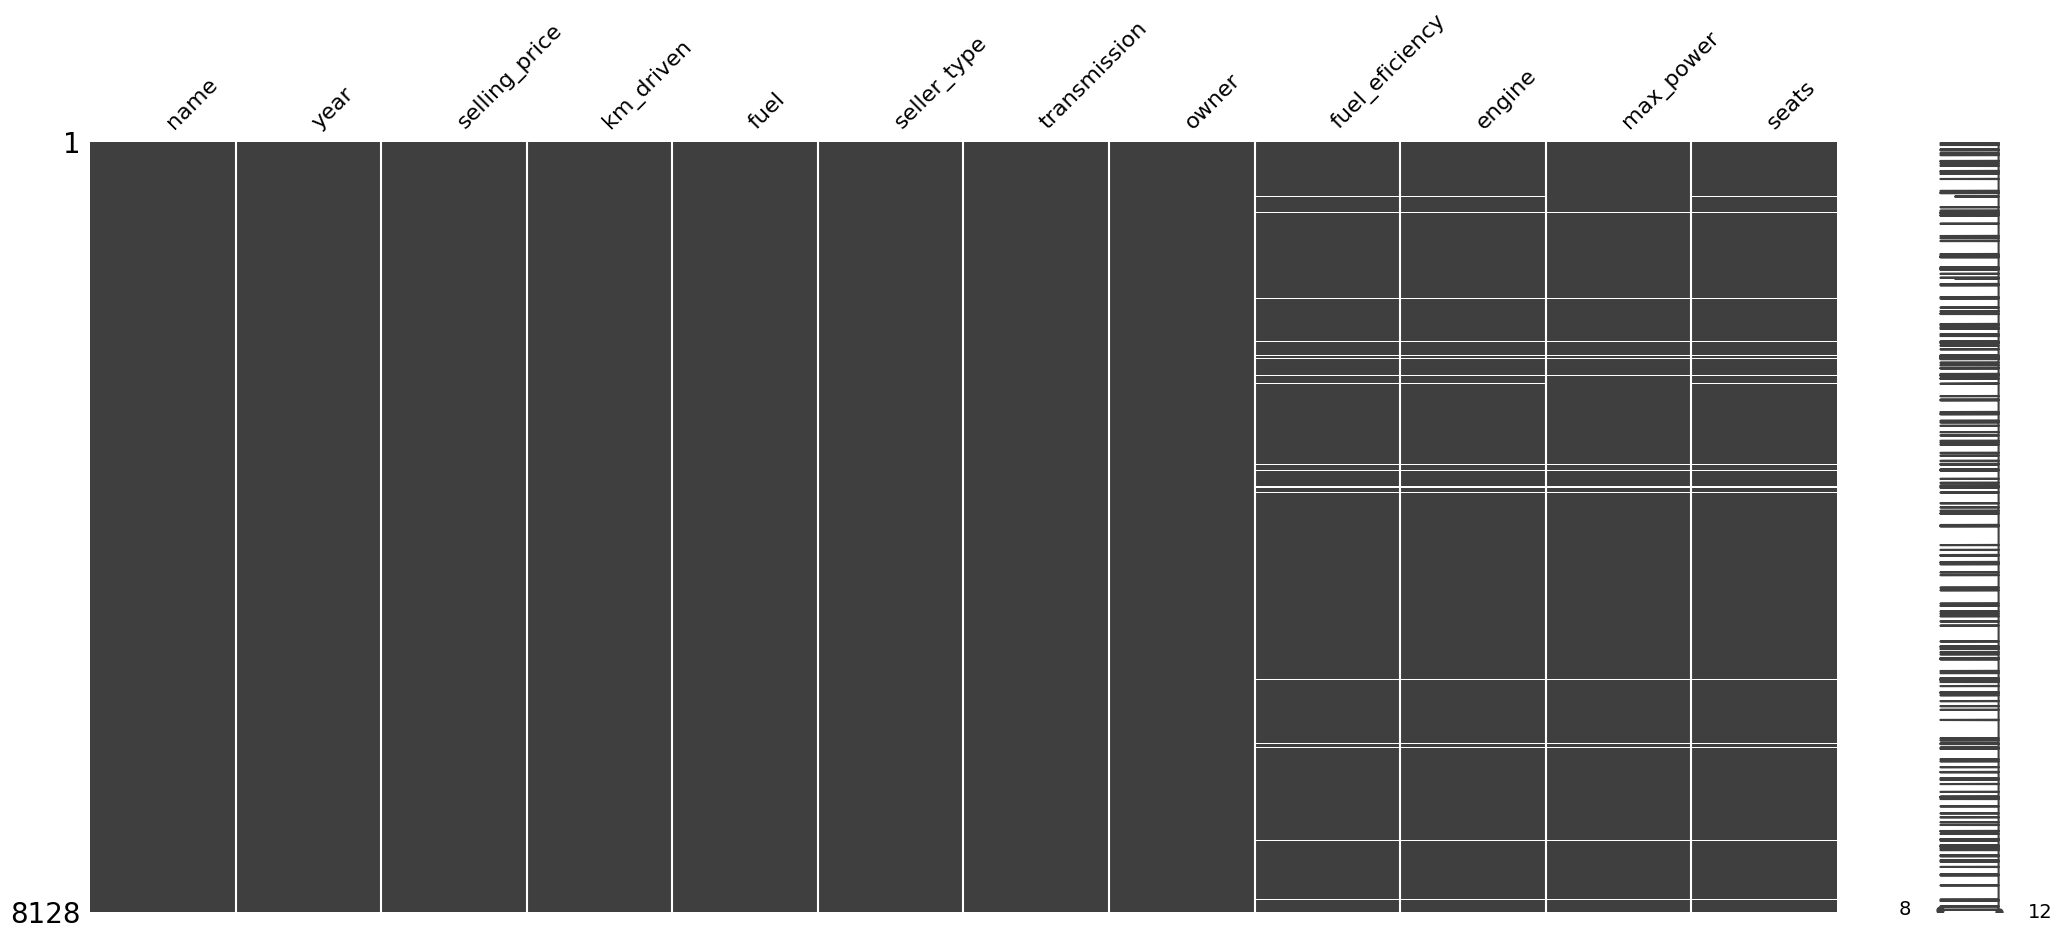

In [218]:
msno.matrix(loaded_data)
plt.show()

Dari gambaran data di atas, terlihat bahwa kolom fuel_eficiency, engine, max_power, dan seats memiliki garis-garis putih. Hal ini menunjukkan bahwa terdapat missing value atau data kosong pada kolom tersebut

#### Plot outlier dari data penjualan

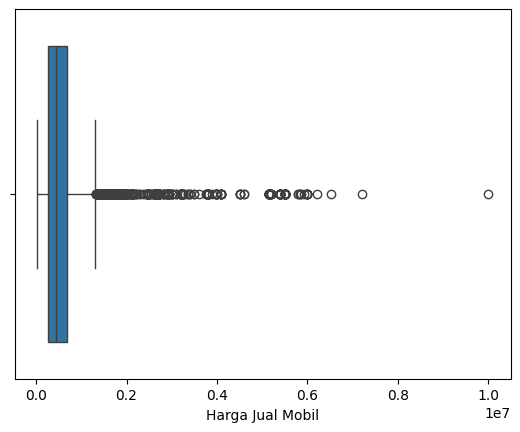

In [200]:
sns.boxplot(x=loaded_data["selling_price"])
plt.xlabel("Harga Jual Mobil")
plt.show()

Dari grafik tersebut, terlihat bahwa sangat banyak data "harga jual mobil" yang jauh dari rentang normalitas datanya. Rentang tersebut berada di antara 0.0 - 0.2 * 10e7.

#### Plot outlier dari kolom year

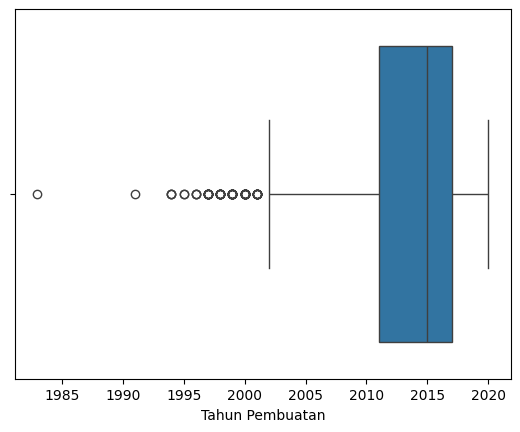

In [219]:
sns.boxplot(x=loaded_data["year"])
plt.xlabel("Tahun Pembuatan")
plt.show()

Terdapat beberapa data tahun pembuatan mobil yang berada di luar rentang normalitas data.

#### Plot outlier kolom km_driver

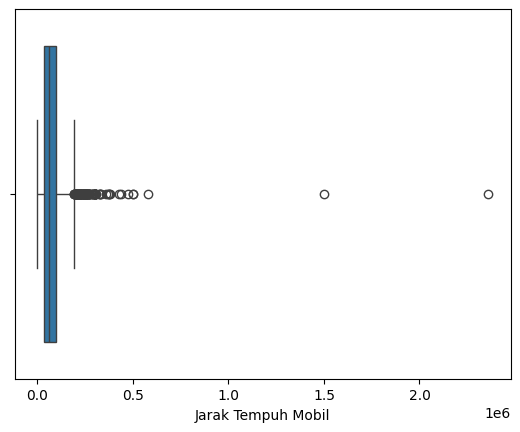

In [220]:
sns.boxplot(x=loaded_data["km_driven"])
plt.xlabel("Jarak Tempuh Mobil")
plt.show()

Terlihat pada grafik di atas, terdapat beberapa data yang kemunculannya sangat jarang, sehingga sangat berpengaruh terhadap normalitas data

#### Plot outlier fuel_eficiency

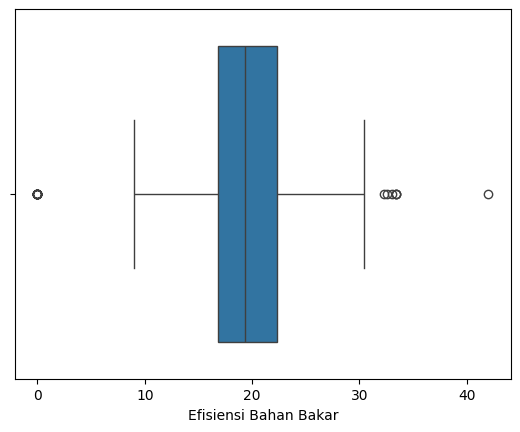

In [222]:
sns.boxplot(x=loaded_data["fuel_eficiency"])
plt.xlabel("Efisiensi Bahan Bakar")
plt.show()

Hanya terdapat beberapa data efisiensi bahan bakar yang berada di luar rentang normalitas data

#### Plot outlier kolom engine

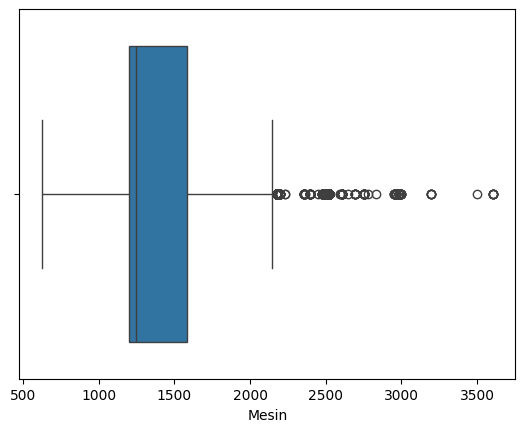

In [223]:
sns.boxplot(x=loaded_data["engine"])
plt.xlabel("Mesin")
plt.show()

Pada data di atas, normalitas data mesin berada pada rentang 500 hingga 2000. Sehingga data yang berada pada rentang diluar itu termasuk ke dalam outlier

#### Plot outlier kolom max_power

<Axes: xlabel='max_power'>

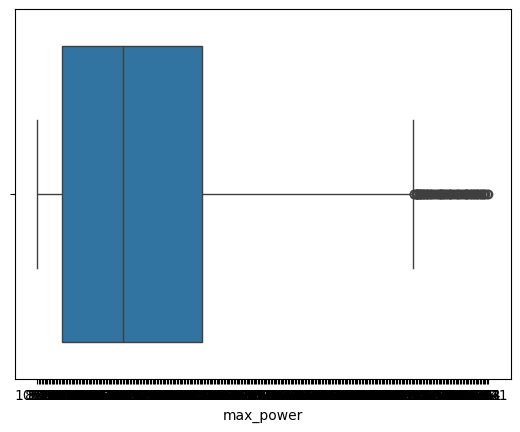

In [305]:
sns.boxplot(x=loaded_data["max_power"])

## Data Cleaning

### Menghapus Data duplikat

In [236]:
loaded_data.duplicated().sum()

1202

In [237]:
print(len(loaded_data));
loaded_data.drop_duplicates(inplace=True)
print(len(loaded_data))
loaded_data

8128
6926


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


### Menangani missing value dengan mengisinya menggunakan nilai rata-rata dari data

#### Melihat terlebih dahulu apakah data yang missing pada kolom tertentu memiliki nilai missing pada kolom lainnya

In [241]:
# Melihat statistik data
loaded_data.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,6926.000000,6.926000e+03,6.926000e+03,6718.00000,6718.000000,6718.000000
mean,2013.420300,5.172707e+05,7.399568e+04,19.46531,1430.891337,5.434653
std,4.078286,5.197670e+05,5.835810e+04,4.04915,493.493277,0.984230
min,1983.000000,2.999900e+04,1.000000e+00,0.00000,624.000000,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,16.80000,1197.000000,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,19.44000,1248.000000,5.000000
75%,2017.000000,6.335000e+05,1.000000e+05,22.50000,1498.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.00000,3604.000000,14.000000


In [250]:
# Melihat data yang memiliki kolom fuel_eficiency = 0
loaded_data[loaded_data["fuel_eficiency"] == 0]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
644,Tata Indica Vista Aura Safire Anniversary Edition,2009,135000,28900,Petrol,Individual,Manual,Second Owner,0.0,1172.0,65,5.0
785,Hyundai Santro Xing GL,2009,120000,90000,Petrol,Individual,Manual,Second Owner,0.0,1086.0,62,5.0
1649,Hyundai Santro Xing GL,2008,105000,128000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62,5.0
1676,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987.0,165,5.0
2137,Land Rover Freelander 2 TD4 HSE,2013,1650000,64788,Diesel,Dealer,Automatic,First Owner,0.0,2179.0,115,5.0
2366,Hyundai Santro Xing (Non-AC),2010,110000,80000,Petrol,Individual,Manual,Second Owner,0.0,1086.0,62.1,5.0
2725,Hyundai Santro Xing (Non-AC),2013,184000,15000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.1,5.0
5276,Hyundai Santro Xing GL,2008,175000,40000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62,5.0
5843,Volkswagen Polo GT TSI BSIV,2014,574000,28080,Petrol,Dealer,Automatic,First Owner,0.0,1197.0,103.25,5.0
5846,Volkswagen Polo GT TSI BSIV,2014,575000,28100,Petrol,Dealer,Automatic,First Owner,0.0,1197.0,103.25,5.0


In [230]:
# Menghitung total masing-masing missing value pada kolom
loaded_data.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
fuel_eficiency,208
engine,208


In [251]:
# Mengubah missing value menjadi 0
loaded_data.fillna(0, inplace=True)
loaded_data.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
fuel_eficiency,0
engine,0


In [264]:
# melihat kembali missing value pada datat
filtered_data = loaded_data[loaded_data["fuel_eficiency"] == 0]
filtered_data.iloc[:, -4:]

,fuel_eficiency,engine,max_power,seats
13,0.0,0.0,0,0.0
31,0.0,0.0,0,0.0
78,0.0,0.0,0,0.0
87,0.0,0.0,0,0.0
119,0.0,0.0,0,0.0
...,...,...,...,...
7740,0.0,0.0,0,0.0
7996,0.0,0.0,0,0.0
8009,0.0,0.0,0,0.0
8068,0.0,0.0,0,0.0


Terlihat bahwa nilai missing value pada kolom fuel efficiency, ternyata juga memiliki missing value pada kolom engine, max_power dan seats dengan total data missing value sebanyak 223

In [266]:
# Menghapus missing value
loaded_data = loaded_data[~(loaded_data["fuel_eficiency"] == 0)]
loaded_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


#### Plot gambar untuk melihat sebaran data sebelum menangani outliers

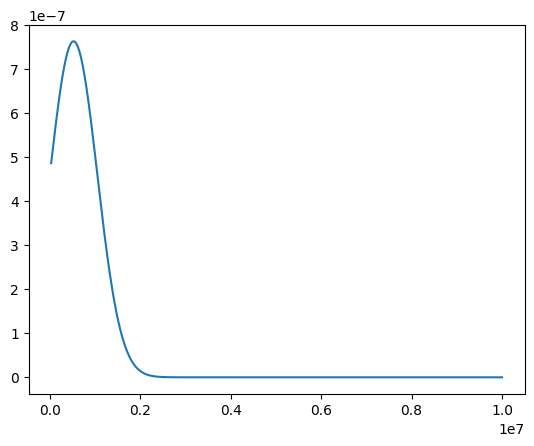

In [270]:
std = loaded_data["selling_price"].std()
mean = loaded_data["selling_price"].mean()

norm_data = norm.pdf(loaded_data["selling_price"].sort_values(), mean, std);

plt.plot(loaded_data["selling_price"].sort_values(), norm_data);

### Menangani Outliers Dengan
Pada bagian ini, teknik statistik akan digunakan untuk menangani masalah outlier, teknik tersebut adalah distribusi normal Z. Teknik ini memiliki pendekatan sebagai berikut:
1. Menentukan tingkat kepercayaan (99% / 95%) atau menentukan taraf signifikansi alpha (1% / 5%)
2. Menghitung masing-masing standar deviasi, rata-rata
3. Menghitung nilai Z pada masing-masing data yang ada di dataframe menggunakan rumus z score untuk populasi
4. Menentukan apakah data yang dihitung berada di dalam rentang a/2 yang merepresentasikan bukan data outlier dengan cara membandingkan absolute dari z_score hitung berada kurang dari z_threshold (+- z_score > z_threshold)
5. Memperbarui dataframe dengan data terbaru yang sudah dilakukan filter untuk menghilangkan outlier

In [294]:
# Membuat fungsi yang menerima 2 parameter dengan default signifikansi alpha 5% / 0.05
def outliers(data, alpha = 0.05):
  # Menghitung rata-rata
  std = np.std(data)
  miu = np.mean(data)
  z_score = [(x - miu) / std for x in data]
  z_threshold = 0
  if(alpha == 0.01):
    z_threshold = 2.58
  elif(alpha == 0.05):
    z_threshold = 1.96
  else:
    z_threshold = 1.96
  data_outlier = [x for i, x in enumerate(data) if abs(z_score[i]) > z_threshold]
  return data_outlier


#### Menangani outlier pada kolom selling_price

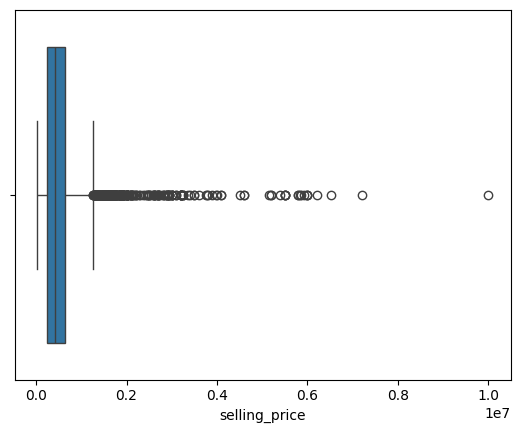

In [295]:
sns.boxplot(x=loaded_data["selling_price"])
plt.show()

In [296]:
print(sorted(outliers(loaded_data["selling_price"])))

[1550000, 1550000, 1550000, 1550000, 1550000, 1560000, 1575000, 1575000, 1575000, 1575000, 1575000, 1576000, 1590000, 1594000, 1600000, 1600000, 1600000, 1600000, 1600000, 1600000, 1625000, 1630000, 1630000, 1650000, 1650000, 1650000, 1650000, 1650000, 1650000, 1650000, 1650000, 1650000, 1650000, 1650000, 1670000, 1675000, 1680000, 1680000, 1689999, 1689999, 1689999, 1689999, 1700000, 1700000, 1700000, 1700000, 1700000, 1700000, 1700000, 1700000, 1745000, 1748999, 1750000, 1750000, 1750000, 1750000, 1750000, 1750000, 1750000, 1750000, 1750000, 1757000, 1789999, 1800000, 1800000, 1800000, 1800000, 1800000, 1800000, 1825000, 1825000, 1850000, 1850000, 1850000, 1850000, 1850000, 1850000, 1850000, 1850000, 1859000, 1864999, 1888000, 1898999, 1900000, 1900000, 1900000, 1900000, 1900000, 1920000, 1925000, 1925000, 1925000, 1938000, 1950000, 1950000, 1950000, 1950000, 1950000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2051000, 2064000, 

In [297]:
print(len(outliers(loaded_data["selling_price"])))

215


Terdapat total 134 data harga penjualan yang berada di luar rentang nilai kritis

In [298]:
# Mengupdate data
updated_data = loaded_data[~loaded_data["selling_price"].isin(outliers(loaded_data["selling_price"]))]
updated_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


In [302]:
updated_data.describe().astype(int)

,year,selling_price,km_driven,fuel_eficiency,engine,seats
count,6488,6488,6488,6488,6488,6488
mean,2013,456717,74437,19,1401,5
std,3,274415,59165,3,466,0
min,1994,29999,1,9,624,4
25%,2011,250000,40000,17,1196,5
50%,2014,400000,70000,19,1248,5
75%,2017,610250,100000,22,1498,5
max,2020,1530000,2360457,33,3498,14


In [303]:
loaded_data.describe().astype(int)

,year,selling_price,km_driven,fuel_eficiency,engine,seats
count,6703,6703,6703,6703,6703,6703
mean,2013,525956,73431,19,1430,5
std,3,522472,58736,3,493,0
min,1994,29999,1,9,624,4
25%,2011,250000,38000,16,1197,5
50%,2014,420000,68519,19,1248,5
75%,2017,650000,100000,22,1498,5
max,2020,10000000,2360457,42,3604,14


<Axes: xlabel='selling_price'>

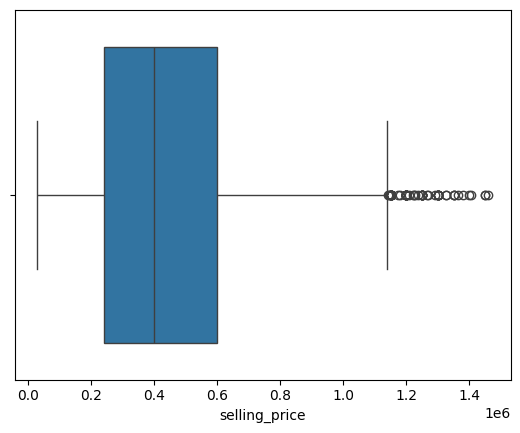

In [354]:
sns.boxplot(x=updated_data["selling_price"])

#### Menangani Outlier pada Kolom max_power

##### Mengubah tipe data pada kolom max_power dari tipe data object menjadi numeric / float

In [322]:
updated_data["max_power"] = pd.to_numeric(updated_data["max_power"], errors="coerce")
updated_data.describe()

<ipython-input-322-7e690ac4ed98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data["max_power"] = pd.to_numeric(updated_data["max_power"], errors="coerce")


,year,selling_price,km_driven,fuel_eficiency,engine,max_power,seats
count,6488.000000,6.488000e+03,6.488000e+03,6488.000000,6488.000000,6487.000000,6488.000000
mean,2013.507861,4.567171e+05,7.443786e+04,19.647334,1401.405518,84.733576,5.425555
std,3.905063,2.744159e+05,5.916532e+04,3.885380,466.713644,26.579721,0.978735
min,1994.000000,2.999900e+04,1.000000e+00,9.000000,624.000000,32.800000,4.000000
25%,2011.000000,2.500000e+05,4.000000e+04,17.000000,1196.000000,67.100000,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,19.700000,1248.000000,81.800000,5.000000
75%,2017.000000,6.102500e+05,1.000000e+05,22.540000,1498.000000,98.600000,5.000000
max,2020.000000,1.530000e+06,2.360457e+06,33.440000,3498.000000,272.000000,14.000000


<Axes: xlabel='max_power'>

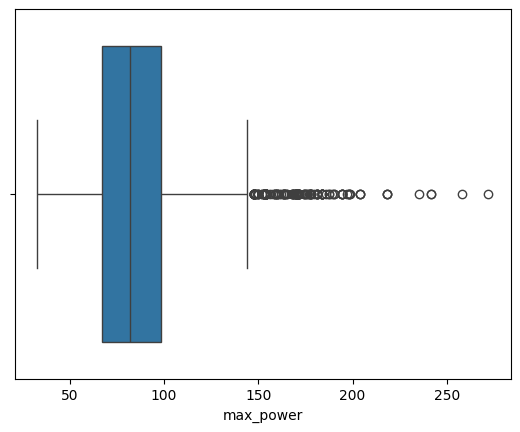

In [323]:
sns.boxplot(x=updated_data["max_power"])

In [324]:
print(f"Total outlier { len(outliers(updated_data.max_power)) }")
print(sorted(outliers( updated_data["max_power"] )))

Total outlier 397
[138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.08, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 139.01, 139.01, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.

In [325]:
updated_data = updated_data[~updated_data["max_power"].isin(outliers(updated_data["max_power"]))]
updated_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [330]:
updated_data.describe()

,year,selling_price,km_driven,fuel_eficiency,engine,max_power,seats
count,6091.000000,6.091000e+03,6.091000e+03,6091.000000,6091.000000,6090.000000,6091.000000
mean,2013.542111,4.337200e+05,7.308197e+04,19.975525,1348.022985,80.337418,5.362338
std,3.944316,2.489620e+05,5.677918e+04,3.744147,424.417768,20.232003,0.947152
min,1994.000000,2.999900e+04,1.000000e+00,10.500000,624.000000,32.800000,4.000000
25%,2011.000000,2.400000e+05,3.772950e+04,17.500000,1193.000000,67.060000,5.000000
50%,2014.000000,4.000000e+05,6.800000e+04,19.810000,1248.000000,78.900000,5.000000
75%,2017.000000,6.000000e+05,1.000000e+05,22.740000,1493.000000,90.000000,5.000000
max,2020.000000,1.460000e+06,2.360457e+06,33.440000,2956.000000,135.100000,14.000000


<Axes: xlabel='max_power'>

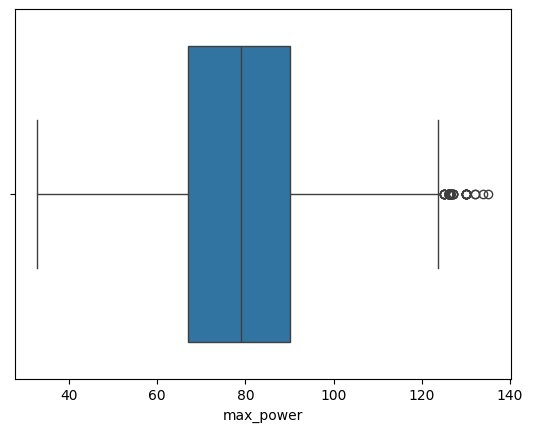

In [355]:
sns.boxplot(x=updated_data["max_power"])

### Menangani outlier pada kolom km_driven

<Axes: xlabel='km_driven'>

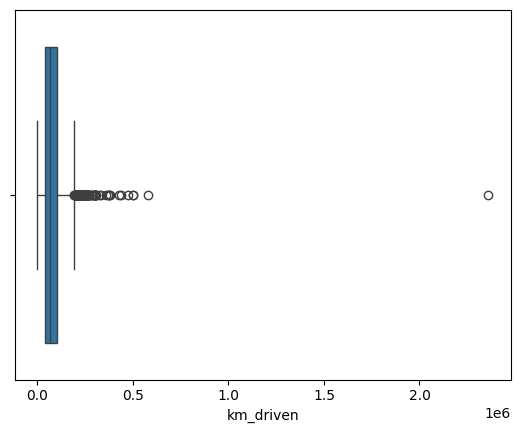

In [348]:
sns.boxplot(x=updated_data["km_driven"])

In [360]:
updated_data = updated_data[~updated_data["km_driven"].isin(outliers(updated_data["km_driven"]))]
updated_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


<Axes: xlabel='km_driven'>

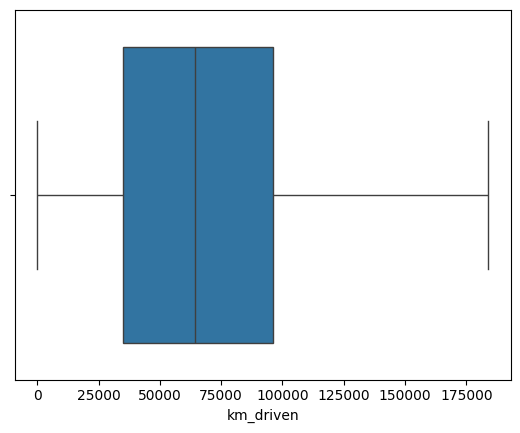

In [361]:
sns.boxplot(x=updated_data["km_driven"])

In [368]:
updated_data.describe().astype(int)

,year,selling_price,km_driven,fuel_eficiency,engine,max_power,seats
count,5908,5908,5908,5908,5908,5907,5908
mean,2013,435273,67730,20,1331,80,5
std,3,249273,38555,3,406,20,0
min,1994,29999,1,10,624,32,4
25%,2011,245000,35000,17,1186,67,5
50%,2014,400000,64490,20,1248,78,5
75%,2017,600000,96000,22,1493,88,5
max,2020,1460000,184000,33,2956,135,14


## Normal Distribution Testing